# Data Mining (KEN4113) #
## Lab 4: Clustering ##

Konstantin Sandfort
i6255681

In [214]:
# Imports
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

## Assignment 1

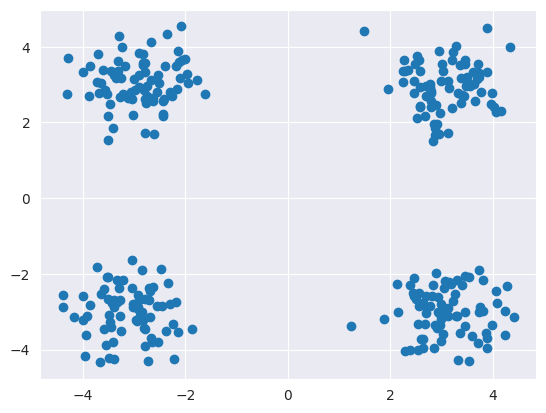

In [215]:
# (a) Data Generation

centers = [[-3, -3], [3, -3], [-3, 3], [3, 3]]
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=0.6, random_state=None)
plt.scatter(X[:, 0], X[:, 1])

In [216]:
def exec_KMeans(data_X, data_y, random_state_):
    fig, axs = plt.subplots(2, 5, figsize=(15, 8))
    y_kmeans_list = []
    scores = []

    for i in range(10):
        # Define k
        k = i+1
        # Fit model
        clusters = KMeans(n_clusters=k, random_state=random_state_, n_init="auto").fit(data_X)
        y_kmeans = clusters.predict(X)
        y_kmeans_list.append(y_kmeans)
        # Retrieve scores (SSE)
        scores.append(clusters.score(X))
        # Retrieve cluster centers
        cntr = clusters.cluster_centers_
        # Create subplots
        axs[int(i / 5), i % 5].scatter(X[:, 0], X[:, 1], c=y_kmeans, s=5, cmap='magma')
        axs[int(i / 5), i % 5].scatter(cntr[:, 0], cntr[:, 1], c='black', s=80, alpha=0.8)
        axs[int(i / 5), i % 5].set_title(f'{k} K-Means')
    plt.show()
    
    # Plot scores
    # Create x labels for barplot
    x_labels = []
    for i in range(10):
        x_labels.append(str(i + 1))
    
    plt.figure()
    plt.bar(x_labels, np.abs(scores))
    plt.title('Sum of Square Errors for Different K-Means')
    plt.xlabel('K-Means')
    plt.ylabel('SSE')
    
    # Print contingency matrices
    for i in range(10):
        print(f'Contingency Matrix for k = {i+1}')
        print(contingency_matrix(data_y, y_kmeans_list[i]))
        print('---')

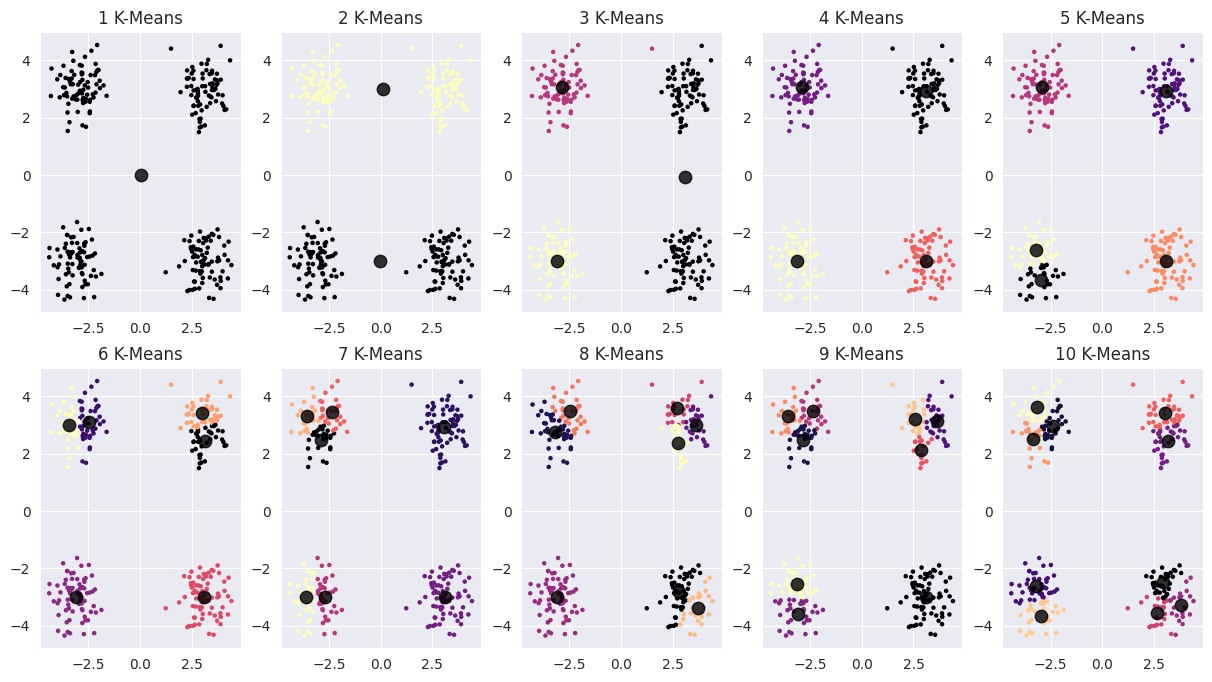

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[75  0]
 [75  0]
 [ 0 75]
 [ 0 75]]
---
Contingency Matrix for k = 3
[[ 0  0 75]
 [75  0  0]
 [ 0 75  0]
 [74  1  0]]
---
Contingency Matrix for k = 4
[[ 0  0  0 75]
 [ 0  0 75  0]
 [ 0 75  0  0]
 [75  0  0  0]]
---
Contingency Matrix for k = 5
[[28  0  0  0 47]
 [ 0  0  0 75  0]
 [ 0  0 75  0  0]
 [ 0 75  0  0  0]]
---
Contingency Matrix for k = 6
[[ 0  0 75  0  0  0]
 [ 0  0  0 75  0  0]
 [ 0 42  0  0  0 33]
 [37  0  0  0 38  0]]
---
Contingency Matrix for k = 7
[[ 0  0  0 39  0  0 36]
 [ 0  0 75  0  0  0  0]
 [27  0  0  0 26 22  0]
 [ 0 75  0  0  0  0  0]]
---
Contingency Matrix for k = 8
[[ 0  0  0 75  0  0  0  0]
 [50  0  0  0  0  0 25  0]
 [ 0 44  0  0  0 31  0  0]
 [ 0  0 29  0 20  0  0 26]]
---
Contingency Matrix for k = 9
[[ 0  0  0 33  0  0  0  0 42]
 [75  0  0  0  0  0  0  0  0]
 [ 0 28  0  0 25  0 22  0  0]
 [ 0  0 32  0  0 17  0 26  0]]
---
Contingency Matrix for k = 10
[[ 0  0 47  0  0

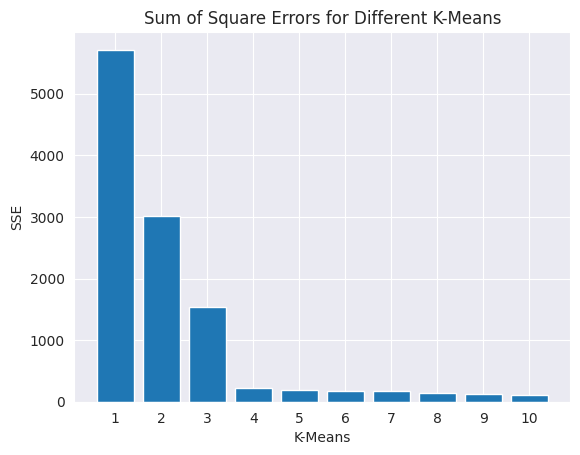

In [217]:
# (b), (c)
exec_KMeans(X, y, None)

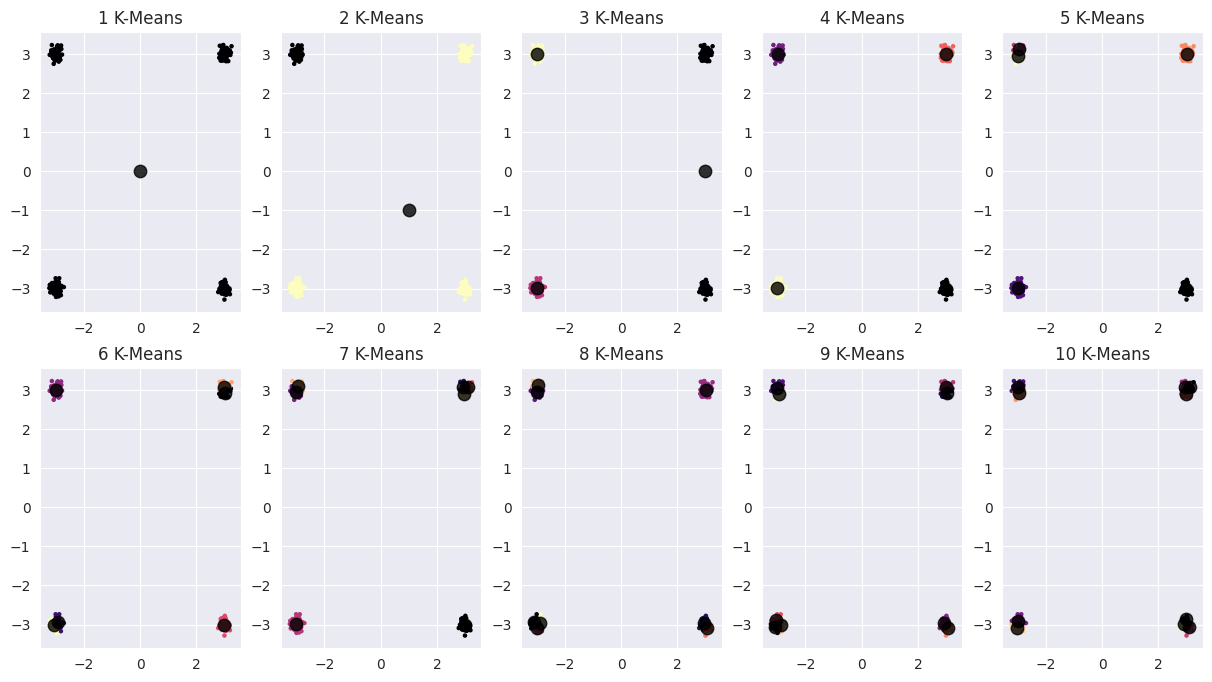

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[ 0 75]
 [ 0 75]
 [75  0]
 [ 0 75]]
---
Contingency Matrix for k = 3
[[ 0 75  0]
 [75  0  0]
 [ 0  0 75]
 [75  0  0]]
---
Contingency Matrix for k = 4
[[ 0  0  0 75]
 [75  0  0  0]
 [ 0 75  0  0]
 [ 0  0 75  0]]
---
Contingency Matrix for k = 5
[[ 0 75  0  0  0]
 [75  0  0  0  0]
 [ 0  0 26  0 49]
 [ 0  0  0 75  0]]
---
Contingency Matrix for k = 6
[[ 0 32  0  0  0 43]
 [ 0  0  0 75  0  0]
 [ 0  0 75  0  0  0]
 [31  0  0  0 44  0]]
---
Contingency Matrix for k = 7
[[ 0  0  0 75  0  0  0]
 [75  0  0  0  0  0  0]
 [ 0  0 49  0  0 26  0]
 [ 0 31  0  0 21  0 23]]
---
Contingency Matrix for k = 8
[[29  0  0  0 23  0  0 23]
 [ 0 48  0  0  0 27  0  0]
 [ 0  0 52  0  0  0 23  0]
 [ 0  0  0 75  0  0  0  0]]
---
Contingency Matrix for k = 9
[[24  0  0  0  0 29  0 22  0]
 [ 0  0  0 48  0  0 27  0  0]
 [ 0  0 44  0  0  0  0  0 31]
 [ 0 31  0  0 44  0  0  0  0]]
---
Contingency Matrix for k = 10
[[ 0  0  0 42  0

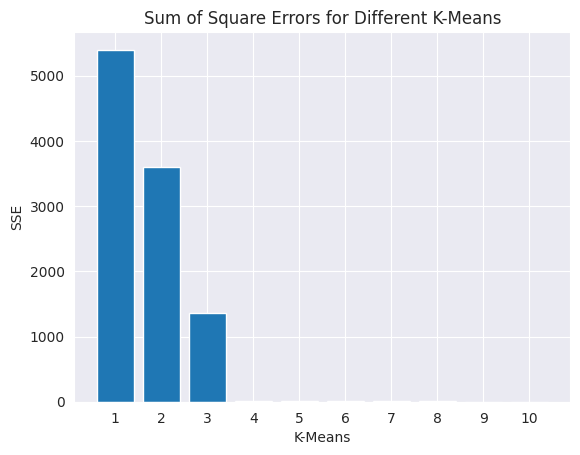

In [218]:
# (d) New Standard Deviation of 0.1
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=0.1, random_state=None)
exec_KMeans(X, y, None)

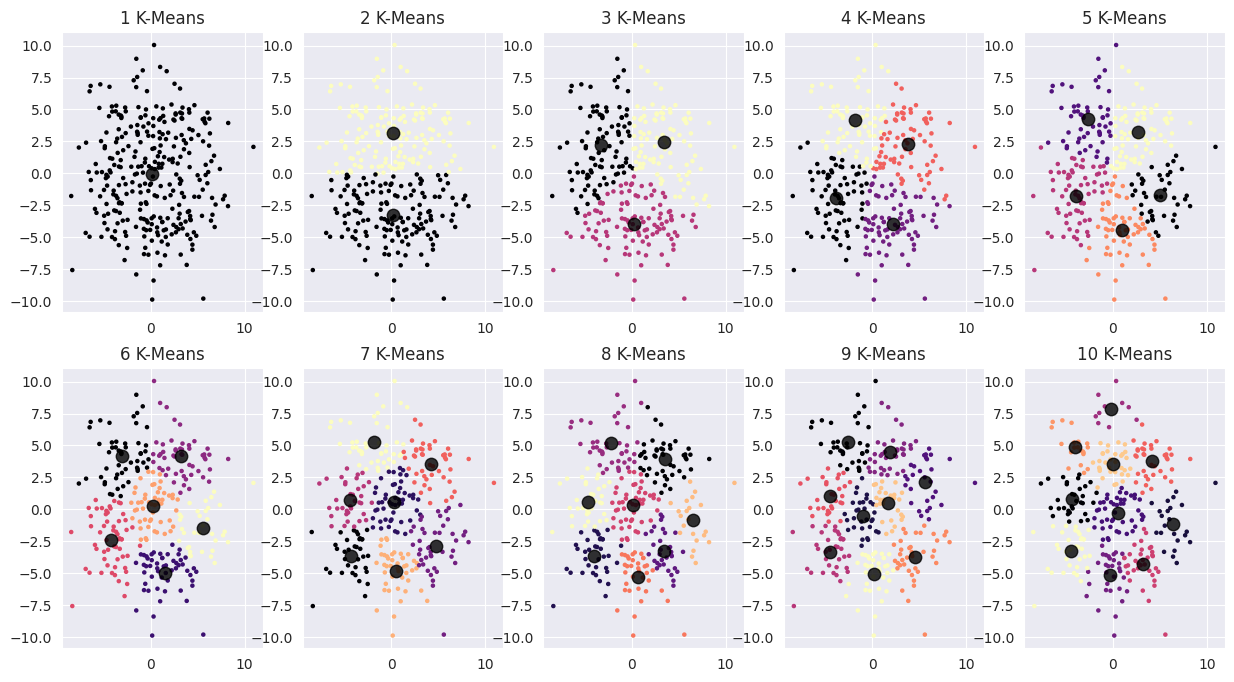

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[65 10]
 [67  8]
 [ 8 67]
 [ 9 66]]
---
Contingency Matrix for k = 3
[[26 49  0]
 [ 0 54 21]
 [61  3 11]
 [ 8  6 61]]
---
Contingency Matrix for k = 4
[[51 19  0  5]
 [ 4 55 16  0]
 [18  2  5 50]
 [ 1  6 54 14]]
---
Contingency Matrix for k = 5
[[ 1  4 49 21  0]
 [32  0  1 38  4]
 [ 0 45 17  2 11]
 [ 9  6  1  3 56]]
---
Contingency Matrix for k = 6
[[ 1 16  0 46 11  1]
 [ 0 37  2  1 10 25]
 [46  0  6 10 13  0]
 [ 5  1 44  0 17  8]]
---
Contingency Matrix for k = 7
[[32 11  1 13  0 18  0]
 [ 1  6 39  0  4 25  0]
 [ 2 13  0 22  2  0 36]
 [ 0 20  4  1 39  1 10]]
---
Contingency Matrix for k = 8
[[ 0 33  2  0 11 15  0 14]
 [ 2  1 27  0  8 21 16  0]
 [ 3  2  0 36 13  0  0 21]
 [41  0  4  7 17  0  6  0]]
---
Contingency Matrix for k = 9
[[ 0 15  0  0 31 10  1  1 17]
 [ 0  5  7  1  0  0 35  7 20]
 [32  7  0  6  4 20  0  6  0]
 [ 4  4 22 29  0  0  3 13  0]]
---
Contingency Matrix for k = 10
[[13  0 11 18  0

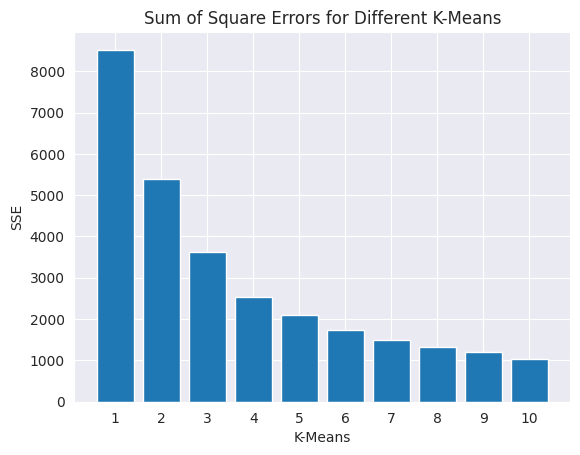

In [219]:
# (d) New Standard Deviation of 2.5
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=2.5, random_state=None)
exec_KMeans(X, y, None)

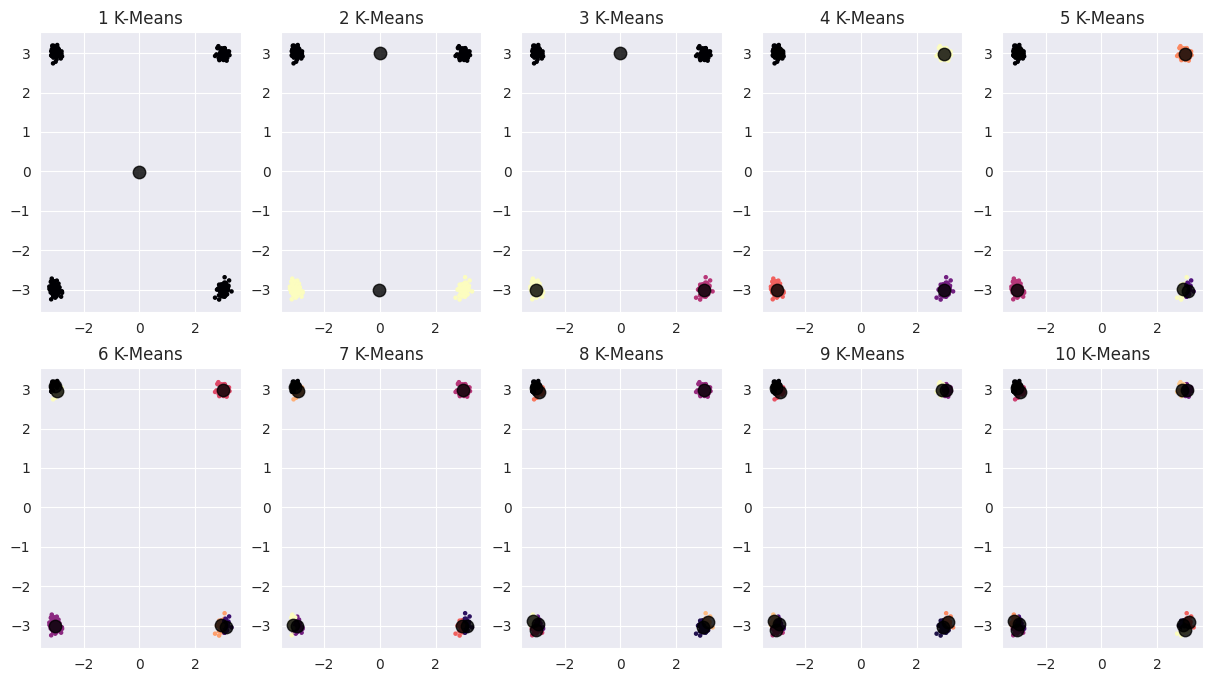

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[ 0 75]
 [ 0 75]
 [75  0]
 [75  0]]
---
Contingency Matrix for k = 3
[[ 0  0 75]
 [ 0 75  0]
 [75  0  0]
 [75  0  0]]
---
Contingency Matrix for k = 4
[[ 0  0 75  0]
 [ 0 75  0  0]
 [75  0  0  0]
 [ 0  0  0 75]]
---
Contingency Matrix for k = 5
[[ 0  0 75  0  0]
 [ 0 25  0  0 50]
 [75  0  0  0  0]
 [ 0  0  0 75  0]]
---
Contingency Matrix for k = 6
[[ 0  0 75  0  0  0]
 [ 0 25  0  0 50  0]
 [38  0  0  0  0 37]
 [ 0  0  0 75  0  0]]
---
Contingency Matrix for k = 7
[[ 0  0 47  0  0  0 28]
 [ 0 26  0  0 49  0  0]
 [43  0  0  0  0 32  0]
 [ 0  0  0 75  0  0  0]]
---
Contingency Matrix for k = 8
[[ 0  0 29  0 30  0  0 16]
 [ 0 60  0  0  0  0 15  0]
 [47  0  0  0  0 28  0  0]
 [ 0  0  0 75  0  0  0  0]]
---
Contingency Matrix for k = 9
[[ 0  0 29  0 30  0  0 16  0]
 [ 0 60  0  0  0  0 15  0  0]
 [47  0  0  0  0 28  0  0  0]
 [ 0  0  0 44  0  0  0  0 31]]
---
Contingency Matrix for k = 10
[[ 0  0 29  0 30

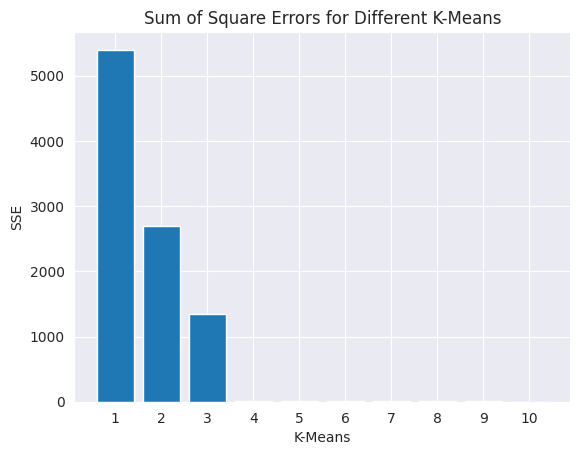

In [220]:
# (e) - Standard Deviation of 0.1
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=0.1, random_state=None)
exec_KMeans(X, y, 42)

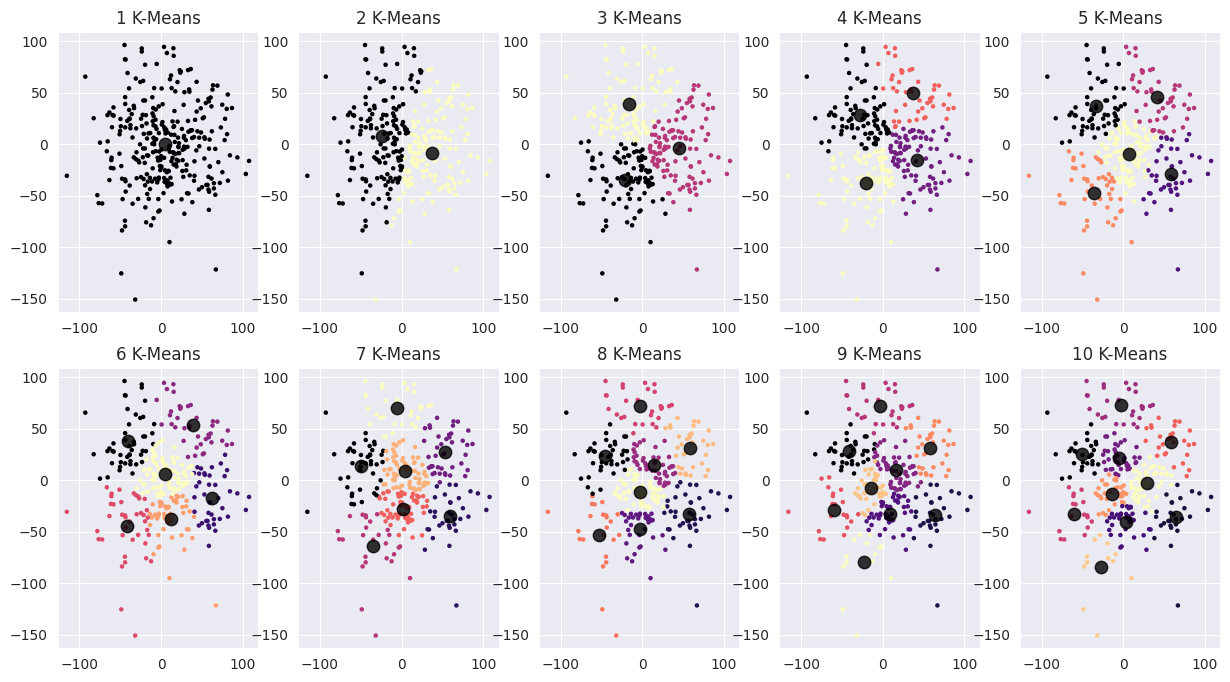

Contingency Matrix for k = 1
[[75]
 [75]
 [75]
 [75]]
---
Contingency Matrix for k = 2
[[37 38]
 [39 36]
 [44 31]
 [37 38]]
---
Contingency Matrix for k = 3
[[18 32 25]
 [28 25 22]
 [23 20 32]
 [26 32 17]]
---
Contingency Matrix for k = 4
[[23 27  9 16]
 [19 23  8 25]
 [24 14 18 19]
 [15 24 11 25]]
---
Contingency Matrix for k = 5
[[15 14 11 10 25]
 [15 15  9 17 19]
 [18  8 16  9 24]
 [12  7 12 12 32]]
---
Contingency Matrix for k = 6
[[15 14  8 10 10 18]
 [12 11  8 14 16 14]
 [11  7 16  6 12 23]
 [10  9  8 11 13 24]]
---
Contingency Matrix for k = 7
[[13 13 10  8 10 15  6]
 [12 11 10 10 15 11  6]
 [ 7  5 11  5 11 23 13]
 [11  6 11  4 21 16  6]]
---
Contingency Matrix for k = 8
[[12 14  4  9  5  9  8 14]
 [11 13 11 10  6  7  7 10]
 [ 6  5  9 17 13  5 10 10]
 [11  6 10 11  4  2  8 23]]
---
Contingency Matrix for k = 9
[[12 10 11 12  5  7  8  7  3]
 [ 9  9 12 11  6  5  7 10  6]
 [ 7  5 10 15 13  5 10  8  2]
 [ 8  6 14 16  4  4  8 11  4]]
---
Contingency Matrix for k = 10
[[ 9  9  6  8  5

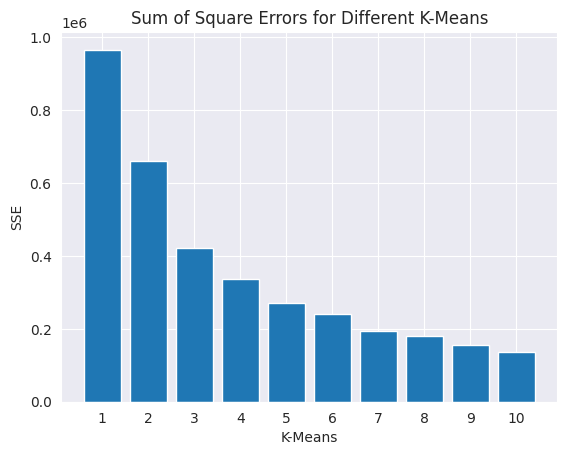

In [221]:
# (e) - Standard Deviation of 2.5
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=42, random_state=None)
exec_KMeans(X, y, 42)

## Assignment 2

In [222]:
# Load data
X = pd.read_csv('vertebrate.csv')
print(X.head(20))

# Remove non-numeric columns
y = X['Class'].tolist()
names = X['Name'].tolist()
X = X.drop(columns=['Name', 'Class'])

             Name  Warm-blooded  Gives Birth  Aquatic Creature  \
0           human             1            1                 0   
1          python             0            0                 0   
2          salmon             0            0                 1   
3           whale             1            1                 1   
4            frog             0            0                 1   
5          komodo             0            0                 0   
6             bat             1            1                 0   
7          pigeon             1            0                 0   
8             cat             1            1                 0   
9   leopard shark             0            1                 1   
10         turtle             0            0                 1   
11        penguin             1            0                 1   
12      porcupine             1            1                 0   
13            eel             0            0                 1   
14     sal

In [223]:
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
def hierarchical_clustering(link_type: str):
    labels = []
    for i in range(len(names)):
        labels.append(f'{y[i]} | {names[i]}')
    Z = linkage(X, link_type)
    plt.figure(figsize=(10, 5))
    dn = dendrogram(
            Z,
            orientation='left',
            labels=labels,
            distance_sort='descending',
            show_leaf_counts=False
          )

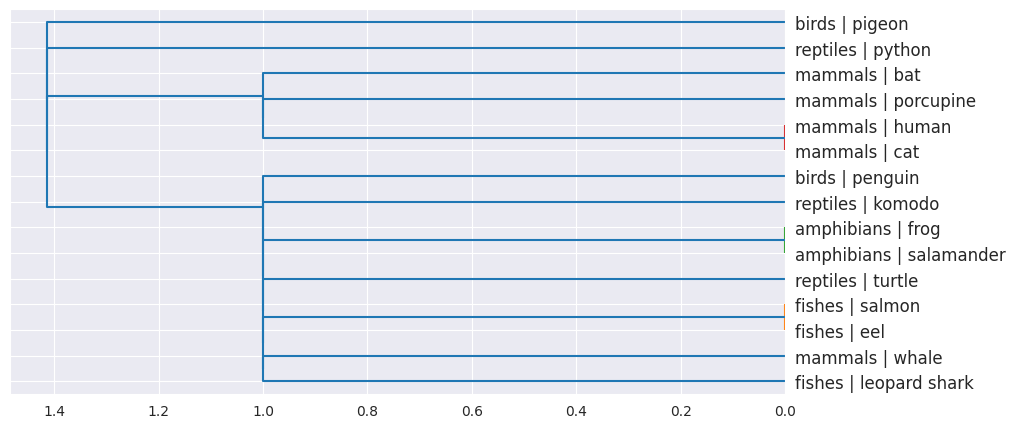

In [224]:
hierarchical_clustering('single')

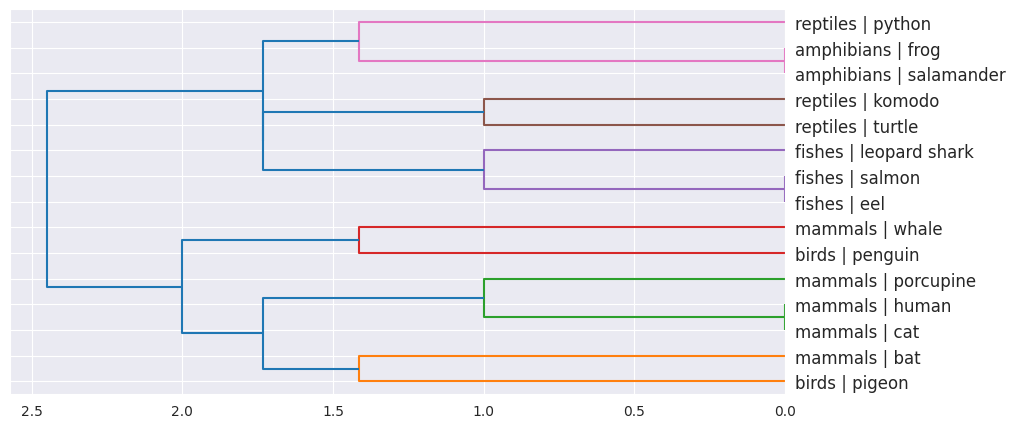

In [225]:
hierarchical_clustering('complete')

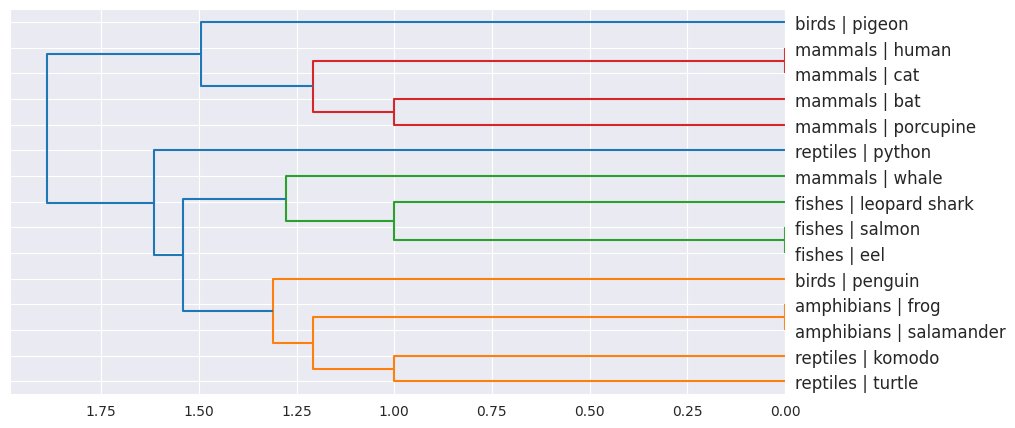

In [226]:
hierarchical_clustering('average')

## Assignment 3

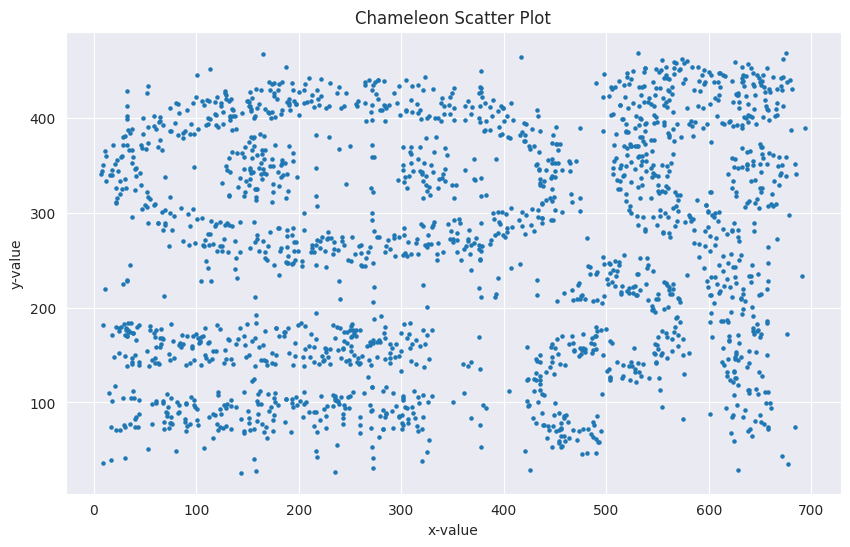

In [227]:
# Load data
X = pd.read_csv('chameleon.csv')
#print(X.iloc[:, 0])
plt.figure(figsize=(10, 6))
plt.title('Chameleon Scatter Plot')
plt.xlabel('x-value')
plt.ylabel('y-value')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=5)

In [228]:
# (c) - Experiment with different EPS values

def exec_DBSCAN(eps_value):
    db = DBSCAN(eps=eps_value, min_samples=5)
    db.fit(X)
    pred = db.fit_predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.title(f'Scatter Plot (EPS = {eps_value})')
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=pred, s=5, cmap='viridis')

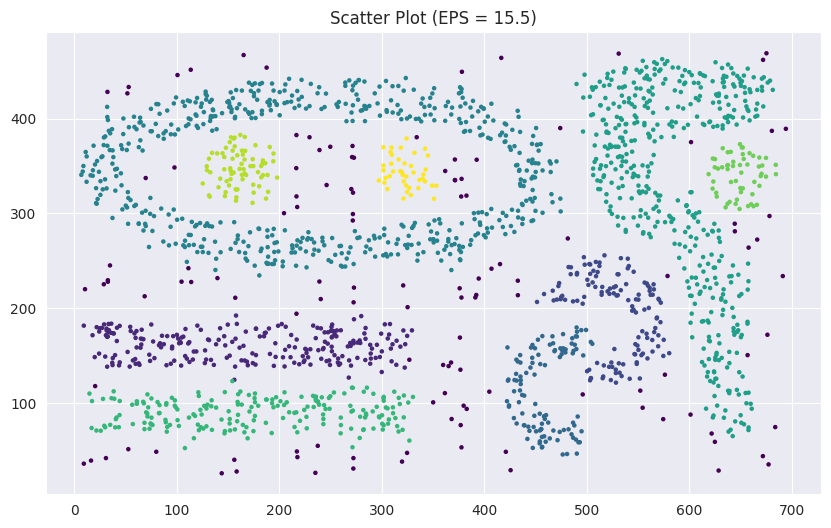

In [229]:
exec_DBSCAN(15.5)

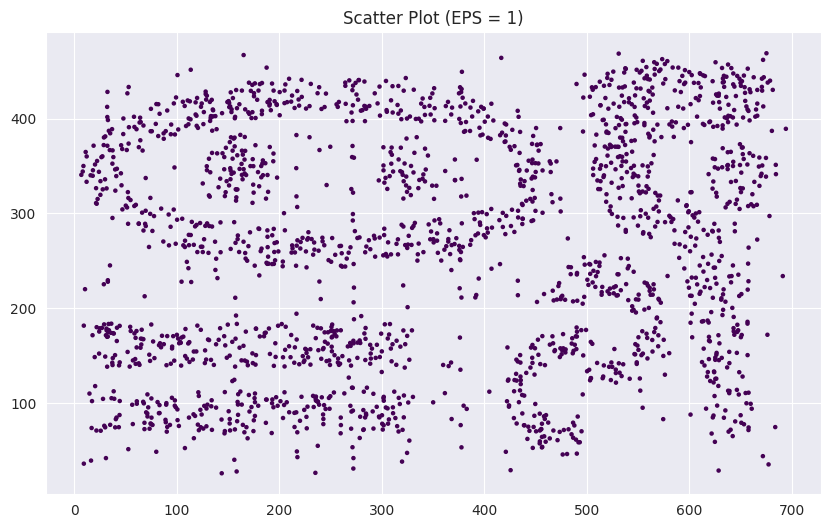

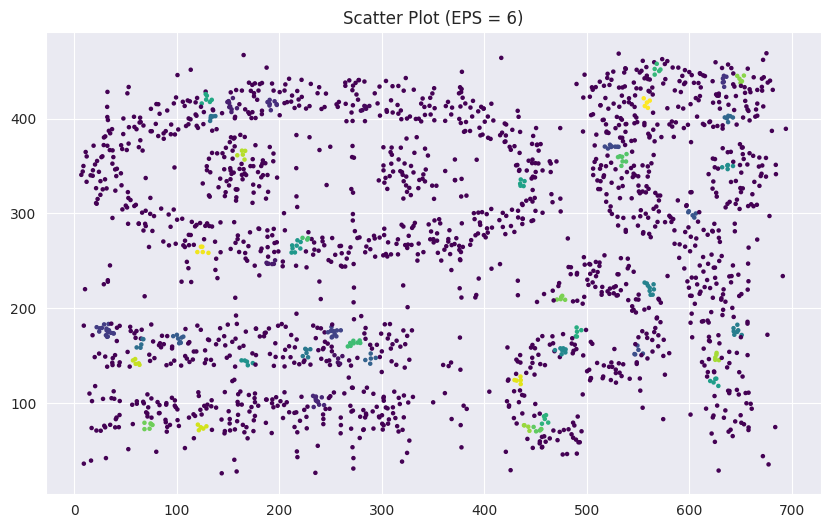

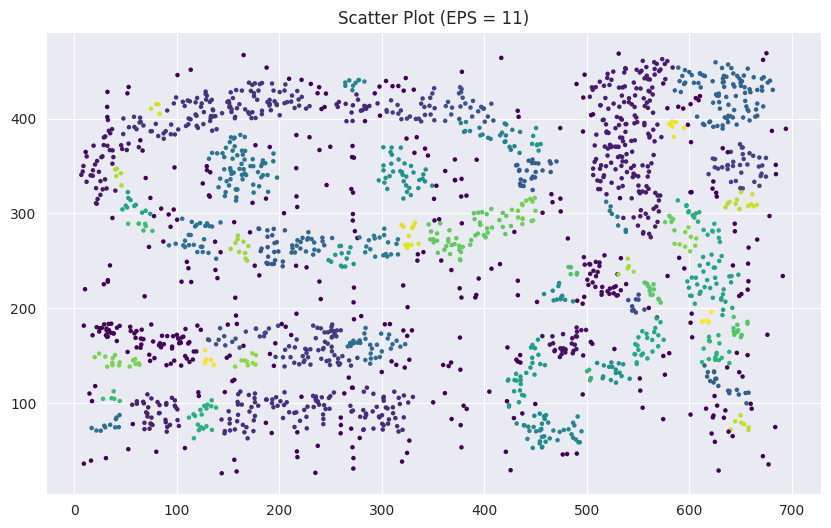

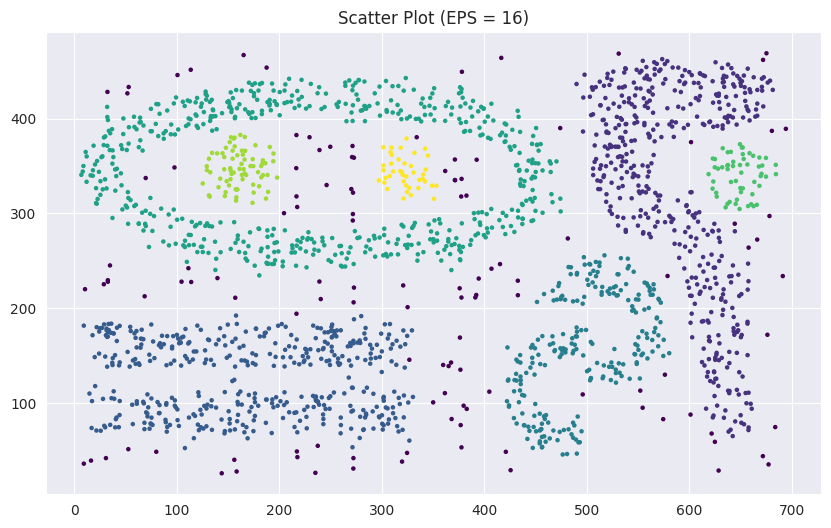

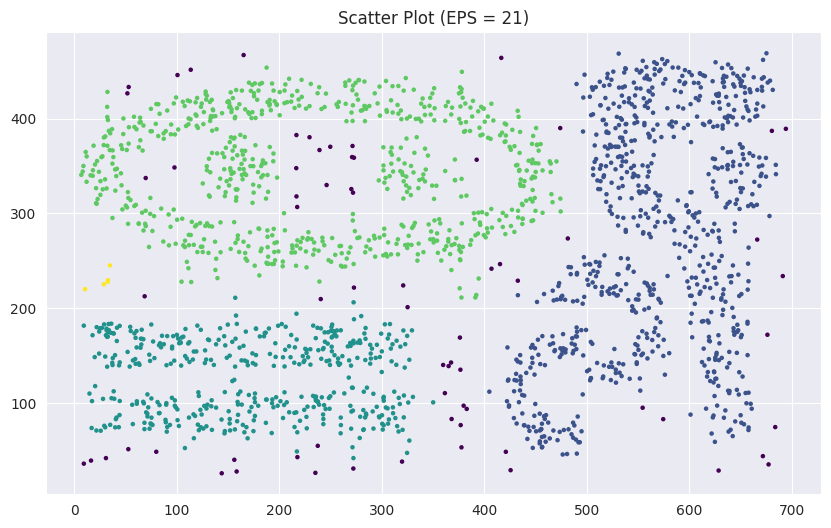

In [230]:
for i in [1, 6, 11, 16, 21]:
    exec_DBSCAN(i)